## Set Up

In [8]:
import pandas as pd
#!pip install pandas_profiling
import pandas_profiling
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

## Data Acquisition

In [5]:
url = "https://raw.githubusercontent.com/euniceworifah/Passion-Projects/main/Visualization%20of%20Foreign%20Aid%20to%20African%20Countries/Data/ODA%20-%20Africa.csv"
df = pd.read_csv(url)
df.shape

(38113, 51)

In [6]:
df.head()

,DONOR,RECIPIENT,SECTOR,FLOW,CHANNEL,AMOUNTTYPE,FLOWTYPE,AIDTYPE,YEAR,Donor Name,...,Climate Mitigation,Climate Adaptation,Desertification,Amount,Amount Type,Amount Tied USD million,Amount Untied USD million,Amount Partially Untied USD million,Nature of Submission,Value
0,959,248,74020,11,0,D,115,C01,2017,UNDP,...,NaN,NaN,NaN,0.048700,Constant Prices (2017 USD millions),NaN,NaN,NaN,1,0.048654
1,959,248,74020,11,0,D,115,C01,2017,UNDP,...,NaN,NaN,NaN,0.137405,Constant Prices (2017 USD millions),NaN,NaN,NaN,1,0.137405
2,959,248,74020,11,0,D,115,C01,2017,UNDP,...,NaN,NaN,NaN,0.347220,Constant Prices (2017 USD millions),NaN,NaN,NaN,1,0.347220
3,958,236,51010,13,0,D,115,A01,2017,IMF (Concessional Trust Funds),...,NaN,NaN,NaN,44.138666,Constant Prices (2017 USD millions),NaN,NaN,NaN,3,44.138666
4,958,287,51010,13,0,D,115,A01,2017,IMF (Concessional Trust Funds),...,NaN,NaN,NaN,6.197771,Constant Prices (2017 USD millions),NaN,NaN,NaN,3,6.197771


## Data Exploration

### Pandas Profiling

In [9]:
#Generate a HTML report
profile = df.profile_report(title='Pandas Profiling Report')
#profile

profile.to_file(output_file="profile_report_output.html")

Summarize dataset:   0%|          | 0/64 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Check data types

Text(0, 0.5, 'Data type')

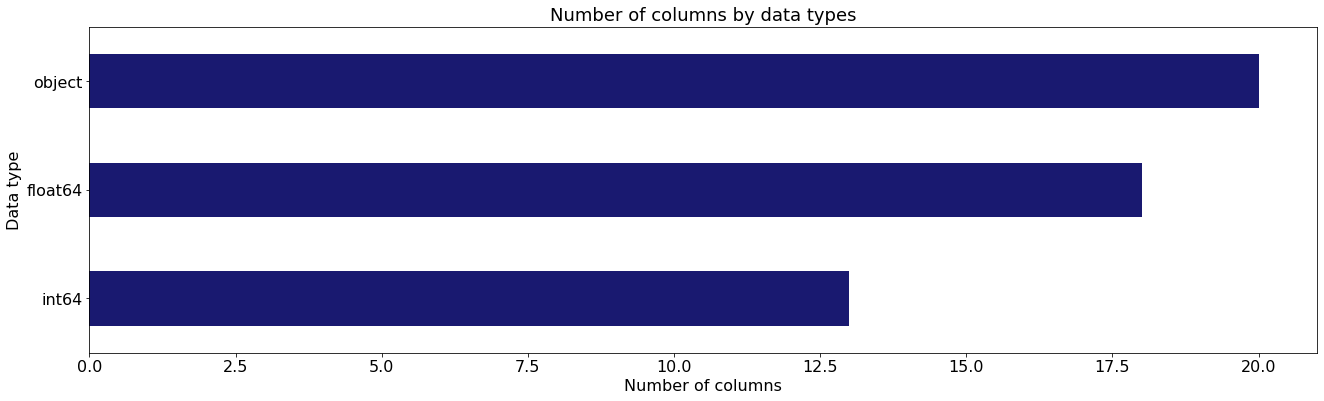

In [10]:
df.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(22, 6),
                                            fontsize=16,
                                           color="midnightblue")

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

### Check missing values

In [14]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

# Missing values statistics
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 51 columns.
There are 20 columns that have missing values.


,Missing Values,% of Total Values
DRR,38113,100.0
SDG Focus,38113,100.0
Disability,38113,100.0
Nutrition,38113,100.0
Amount Partially Untied USD million,30563,80.2
Amount Tied USD million,23830,62.5
Desertification,20731,54.4
Trade Development,17339,45.5
Amount Untied USD million,14848,39.0
RMNCH,14440,37.9


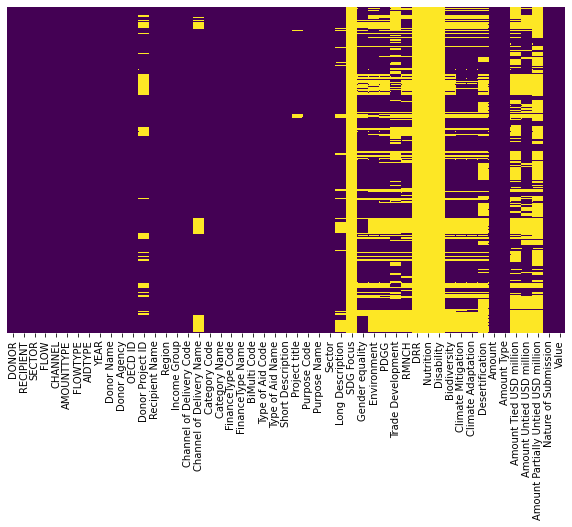

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

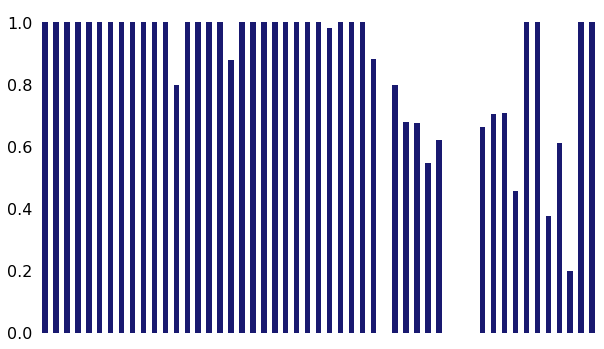

In [16]:
import missingno as msno
#msno.matrix(df.sample(500), figsize=(12,8))
msno.bar(df, figsize=(10,6), color='midnightblue')

### Summary Statistics

In [19]:
df.describe()

,DONOR,RECIPIENT,SECTOR,FLOW,CHANNEL,FLOWTYPE,YEAR,Channel of Delivery Code,Category Code,FinanceType Code,...,Biodiversity,Climate Mitigation,Climate Adaptation,Desertification,Amount,Amount Tied USD million,Amount Untied USD million,Amount Partially Untied USD million,Nature of Submission,Value
count,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.0,38113.0,38113.000000,38113.0,38113.000000,...,25248.000000,26790.000000,26958.000000,17382.000000,38113.000000,14283.000000,23265.000000,7550.000000,38113.000000,38113.000000
mean,349.278068,257.659591,29217.930444,11.052633,21508.409204,115.0,2017.0,21508.409204,10.0,118.422585,...,0.124366,0.099963,0.148824,0.078702,1.473141,0.319447,1.188732,0.050017,3.353134,1.473141
std,366.653985,20.199449,23669.900934,0.353791,18506.629025,0.0,0.0,18506.629025,0.0,51.733430,...,0.432449,0.382739,0.440339,0.322375,9.457199,2.752788,7.290704,1.945820,3.201956,9.457199
min,1.000000,218.000000,11110.000000,11.000000,0.000000,115.0,2017.0,0.000000,10.0,110.000000,...,0.000000,0.000000,0.000000,0.000000,-0.076600,0.000000,-0.076600,0.000000,1.000000,-0.076642
25%,9.000000,240.000000,12262.000000,11.000000,10000.000000,115.0,2017.0,10000.000000,10.0,110.000000,...,0.000000,0.000000,0.000000,0.000000,0.012729,0.000000,0.006800,0.000000,1.000000,0.012740
50%,302.000000,256.000000,15220.000000,11.000000,20000.000000,115.0,2017.0,20000.000000,10.0,110.000000,...,0.000000,0.000000,0.000000,0.000000,0.072000,0.000000,0.059300,0.000000,1.000000,0.072000
75%,701.000000,278.000000,41020.000000,11.000000,20000.000000,115.0,2017.0,20000.000000,10.0,110.000000,...,0.000000,0.000000,0.000000,0.000000,0.400000,0.029850,0.394600,0.000000,8.000000,0.400000
max,1313.000000,289.000000,99820.000000,19.000000,90000.000000,115.0,2017.0,90000.000000,10.0,633.000000,...,2.000000,2.000000,2.000000,2.000000,600.000000,131.430000,403.037500,138.654000,8.000000,600.000000


### Column Names

In [21]:
df.columns

Index(['DONOR', 'RECIPIENT', 'SECTOR', 'FLOW', 'CHANNEL', 'AMOUNTTYPE',
       'FLOWTYPE', 'AIDTYPE', 'YEAR', 'Donor Name', 'Donor Agency', 'OECD ID',
       'Donor Project ID', 'Recipient Name', 'Region', 'Income Group',
       'Channel of Delivery Code', 'Channel of Delivery Name', 'Category Code',
       'Category Name', 'FinanceType Code', 'FinanceType Name', 'BiMulti Code',
       'Type of Aid Code', 'Type of Aid Name', 'Short Description',
       'Project title', 'Purpose Code', 'Purpose Name', 'Sector',
       'Long Description', 'SDG Focus', 'Gender equality', 'Environment',
       'PDGG', 'Trade Development', 'RMNCH', 'DRR', 'Nutrition', 'Disability',
       'Biodiversity', 'Climate Mitigation', 'Climate Adaptation',
       'Desertification', 'Amount', 'Amount Type', 'Amount Tied USD million',
       'Amount Untied USD million', 'Amount Partially Untied USD million',
       'Nature of Submission', 'Value'],
      dtype='object')

In [24]:
test = df.select_dtypes('object')
#test

In [30]:
for i in test:
    print(df[i].value_counts())

D    38113
Name: AMOUNTTYPE, dtype: int64
C01    24021
D02     3695
B01     2791
D01     2016
E01     1724
G01     1557
B03     1456
E02      244
A02      191
B04      145
H02       83
H01       78
A01       65
F01       46
0          1
Name: AIDTYPE, dtype: int64
United States                    7773
France                           3664
Japan                            3640
UNICEF                           2680
Germany                          2121
                                 ... 
Global Green Growth Institute       6
Slovenia                            6
Croatia                             5
United Arab Emirates                4
Azerbaijan                          3
Name: Donor Name, Length: 61, dtype: int64
Agency for International Development             5521
Japanese International Co-operation Agency       3170
Ministry of Foreign Affairs                      2862
UNICEF                                           2680
Department of Foreign Affairs                    1393
    

## Data Visualization